In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import joblib
import numpy as np
from sklearn.model_selection import learning_curve


# Cargar los datos limpios
df = pd.read_csv('data/clean/cleaned_data_final.csv')

In [2]:
# Seleccionar solo las columnas más relevantes
columns_to_keep = [
    'solar_electricity', 'wind_electricity', 'biofuel_electricity', 'hydro_electricity',
    'population', 'gdp', 'electricity_demand', 'energy_per_capita', 'energy_per_gdp',
    'solar_consumption', 'wind_consumption', 'biofuel_consumption', 'hydro_consumption',
    'country', 'iso_code', 'year'
]

# Filtrar el DataFrame para mantener solo las columnas seleccionadas
df_filtered = df[columns_to_keep]

# Manejar valores faltantes (opcional, según tus datos)
df_filtered = df_filtered.dropna()  # O puedes usar imputación

In [3]:
# Instanciar el codificador
label_encoder = LabelEncoder()

# Aplicar Label Encoding a las columnas 'country' e 'iso_code' en df_filtered
df_filtered['country'] = label_encoder.fit_transform(df_filtered['country'])
df_filtered['iso_code'] = label_encoder.fit_transform(df_filtered['iso_code'])

In [4]:
# Definir características (X) y etiquetas (y)
X = df_filtered.drop(columns=['solar_electricity', 'wind_electricity', 
                               'biofuel_electricity', 'hydro_electricity'])

y = df_filtered[['solar_consumption', 'wind_consumption', 
                 'biofuel_consumption', 'hydro_consumption']] 

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

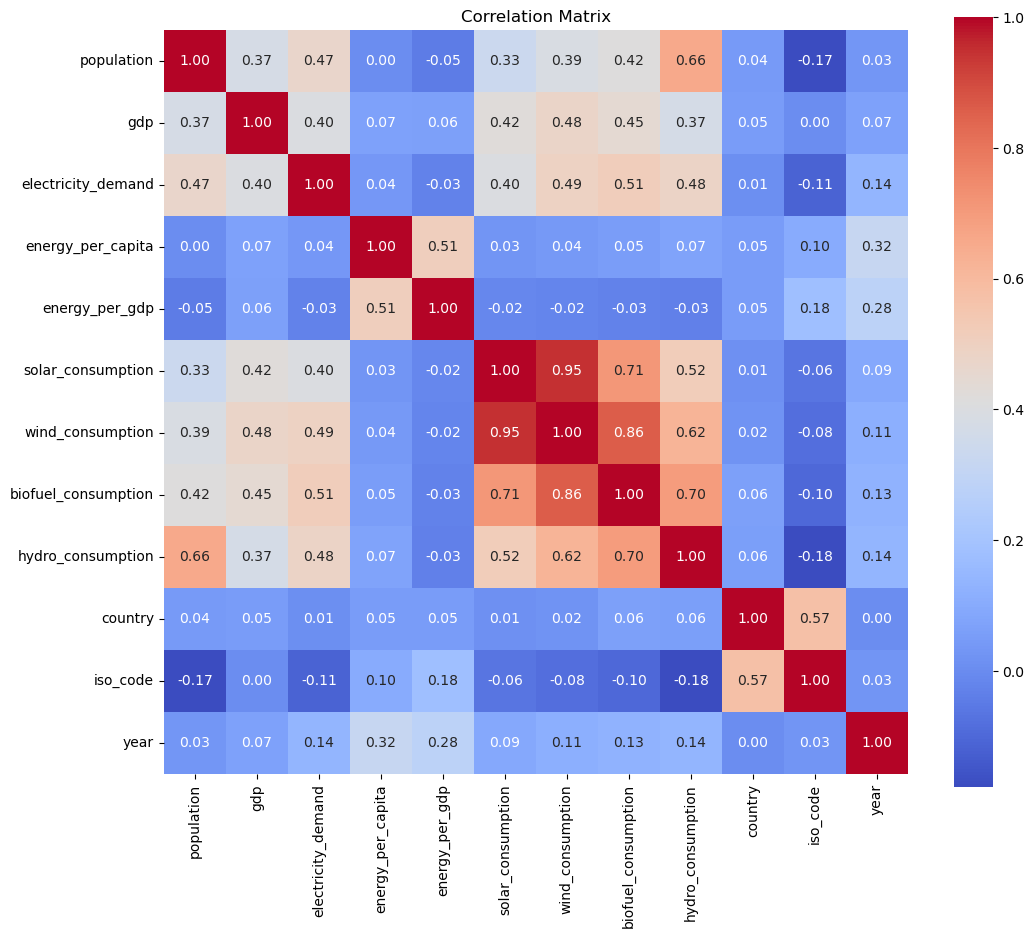

In [19]:
# Correlaciones con los que vamos a trabajar en el modelo
# Definir las características (puedes modificar según tus columnas)
features = X_train.columns.tolist()
df = pd.DataFrame(X_train, columns=features)
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Definir el modelo
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=50, max_depth=10, 
                                                   random_state=42, n_jobs=-1))


In [7]:
# Entrenar el modelo
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=10,
                                                     n_estimators=50, n_jobs=-1,
                                                     random_state=42))

In [8]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Imprimir las métricas
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'MAE: {mae}')

MSE: 16.695974498031774
R^2: 0.998647419428931
MAE: 0.18401028836259162


In [9]:
# Validación cruzada

scores = cross_val_score(model, X, y, cv=5)  # X e y son tus variables independientes y dependientes

print("Cross-validated scores:", scores)
print("Mean score:", scores.mean())

Cross-validated scores: [0.99777669 0.99975312 0.99968004 0.99947536 0.92197475]
Mean score: 0.9837319915638337


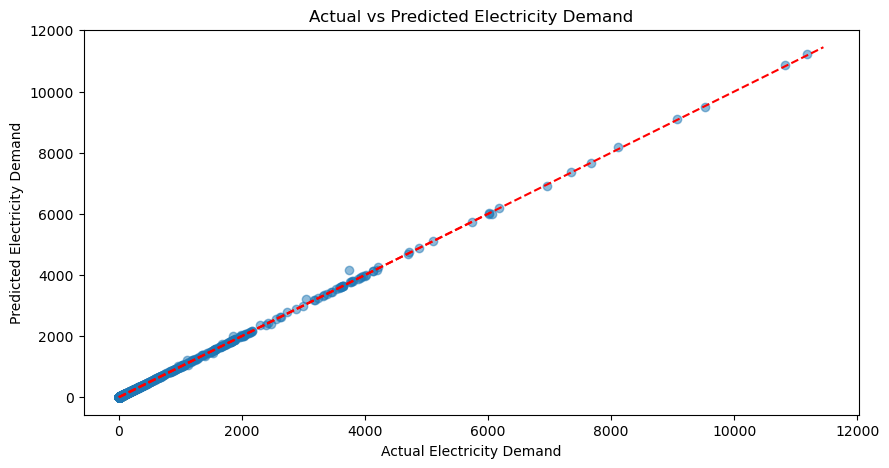

In [10]:
# Gráficos del modelo

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia
plt.xlabel('Actual Electricity Demand')
plt.ylabel('Predicted Electricity Demand')
plt.title('Actual vs Predicted Electricity Demand')
plt.show()

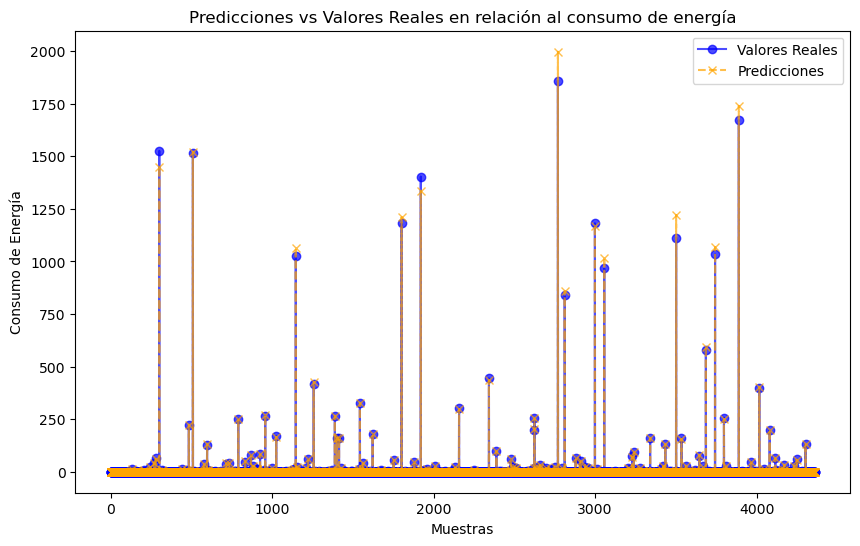

In [11]:
# Selecciona una salida específica
output_index = 0  # Cambia el índice según la salida que quieras visualizar

plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:, output_index], label='Valores Reales', marker='o', color='blue', linestyle='-', alpha=0.7)
plt.plot(y_pred[:, output_index], label='Predicciones', marker='x', color='orange', linestyle='--', alpha=0.7)
plt.title('Predicciones vs Valores Reales en relación al consumo de energía')
plt.xlabel('Muestras')
plt.ylabel('Consumo de Energía')
plt.legend()
plt.show()


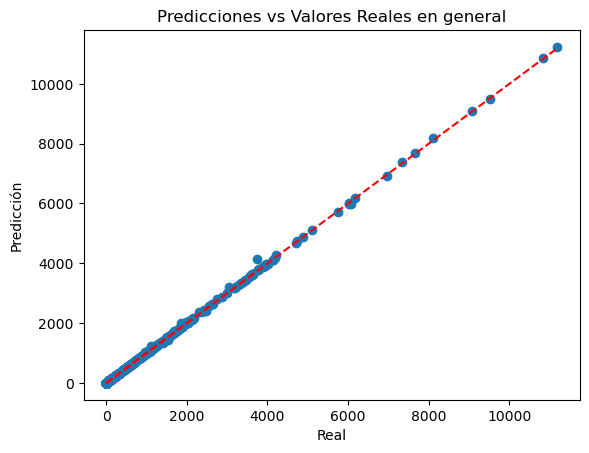

In [12]:
# Contrastar las predicciones con los valores reales
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales en general')
plt.show()

In [13]:
# Validación de la desviación
cross_val_scores = np.array([0.99777669, 0.99975312, 0.99968004, 0.99947536, 0.92197475])
mean_score = cross_val_scores.mean()
std_dev = cross_val_scores.std()

print(f"Mean score: {mean_score}, Standard Deviation: {std_dev}")


Mean score: 0.9837319919999998, Standard Deviation: 0.030887152328254182


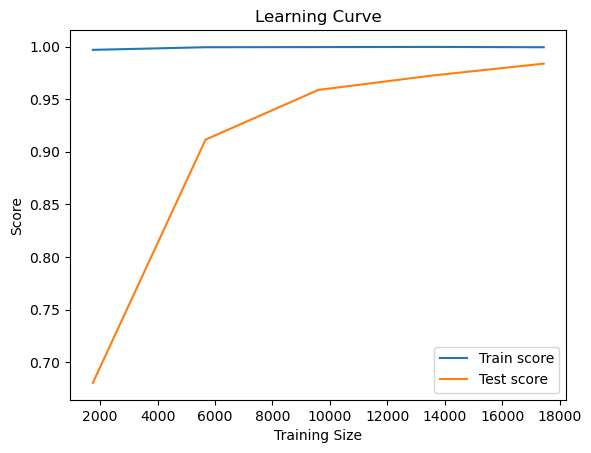

In [14]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train score')
plt.plot(train_sizes, test_mean, label='Test score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()


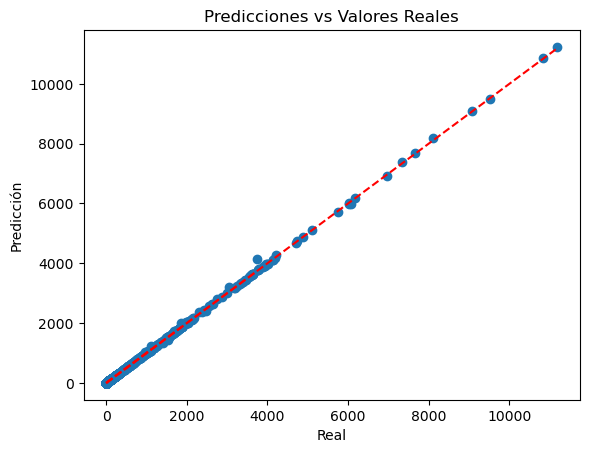

In [15]:
# Contrastar las predicciones con los valores reales
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')
plt.show()

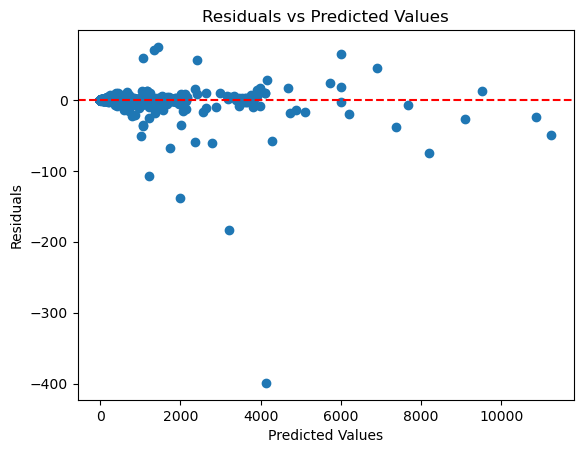

In [16]:
# Comprobar los valores residuales
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [17]:
# Guardar el modelo
joblib.dump(model, 'final_models/seap_model.joblib')

['final_models/seap_model.joblib']